<a href="https://colab.research.google.com/github/Anann99/SEFWaM-Deep-Learning-based-Smart-Ensembled-Framework-for-Waste-Management-/blob/main/augment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob, os, random
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import numpy as np
import matplotlib.pyplot as plt
import cv2
drive.mount('/content/drive')
base_path = './drive/MyDrive/archive/Garbage classification/Garbage classification'

#Pattern Matching for files. We are extracting all jpg files in image list
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))
image1=load_img(img_list[750])
img = img_to_array(image1, dtype=np.uint8)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


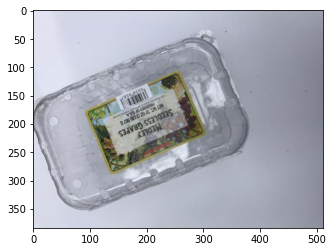

In [ ]:
plt.imshow(img)

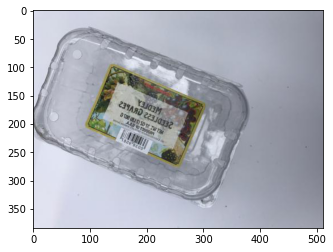

In [ ]:
flipVertical = cv2.flip(img, 0)

plt.imshow(flipVertical)
#Flip Vertical

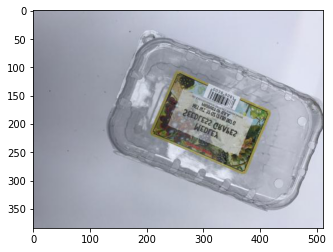

In [ ]:
flipVertical = cv2.flip(img, 0)
f=plt.figure()
plt.imshow(np.rot90(flipVertical,2))
# Flip Horizontal

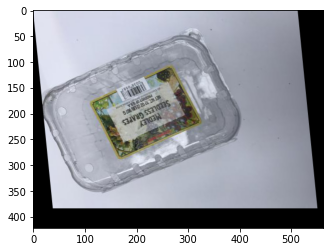

In [ ]:
# get the image shape
rows, cols, dim = img.shape
# transformation matrix for translation
M = np.float32([[1, 0.1, 0],
             	[0, 1  , 0],
            	[0, 0  , 1]])
# shearing applied to y-axis
# M = np.float32([[1,   0, 0],
#             	  [0.5, 1, 0],
#             	  [0,   0, 1]])
# apply a perspective transformation to the image                
sheared_img = cv2.warpPerspective(img,M,(int(cols*1.1),int(rows*1.1)))
plt.imshow(sheared_img)

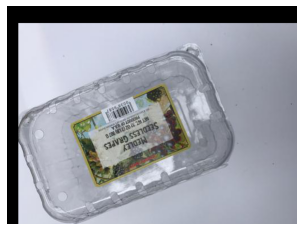

In [ ]:
M = np.float32([[1, 0, 20],
                [0, 1, 30],
                [0, 0, 1]])
# apply a perspective transformation to the image
translated_img = cv2.warpPerspective(img, M, (cols, rows))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(translated_img)

#Shifting the image towards left, right, up or down by the factor of 0.2


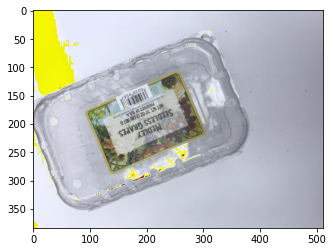

In [ ]:
plt.imshow(img+20)
#Increasing Brightness

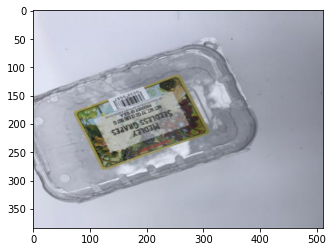

In [ ]:
#Zooming Images

# we import all our required libraries
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

dataImage = img_to_array(img)
# print(dataImage)
# expanding dimension of the load image
imageNew = expand_dims(dataImage, 0)
# now here below we creating the object of the data augmentation class
imageDataGen = ImageDataGenerator(zoom_range=[0.8,1.2])
# because as we alreay load image into the memory, so we are using flow() function, to apply transformation
iterator = imageDataGen.flow(imageNew, batch_size=1)
# below we generate augmented images and plotting for visualization
batch = iterator.next()

image = batch[0].astype('uint8')
	# we plot here raw pixel data
pyplot.imshow(image)

pyplot.show()